Project Overview

For this project, you will take on the role of a Data Scientist / Data Analyst working for a new startup investment firm that helps customers invest their money in stocks. Your task is to extract financial data, such as historical share prices and quarterly revenue reports, from various sources using Python libraries and web scraping techniques. After collecting this data, you will visualize it in a dashboard to identify patterns or trends. The stocks you will work with are Tesla, Amazon, AMD, and GameStop.
Dashboard Analytics Displayed

A dashboard provides a clear view of key insights. In this project, you will practice analyzing datasets and extracting insights to display on a dashboard. You will use prompts to effectively access and visualize data. The goal is to learn how to present insights clearly using Plotly for data visualization.

In [6]:
%pip install yfinance
%pip install bs4
%pip install nbformat
%pip install matplotlib
%pip install numpy<2

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


The system cannot find the file specified.


In [7]:
import yfinance as yf
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [8]:
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock):
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']

    fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

    # Stock price
    axes[0].plot(pd.to_datetime(stock_data_specific.Date), stock_data_specific.Close.astype("float"), label="Share Price", color="blue")
    axes[0].set_ylabel("Price ($US)")
    axes[0].set_title(f"{stock} - Historical Share Price")

    # Revenue
    axes[1].plot(pd.to_datetime(revenue_data_specific.Date), revenue_data_specific.Revenue.astype("float"), label="Revenue", color="green")
    axes[1].set_ylabel("Revenue ($US Millions)")
    axes[1].set_xlabel("Date")
    axes[1].set_title(f"{stock} - Historical Revenue")

    plt.tight_layout()
    plt.show()

Use yfinance to Extract Stock data

In [9]:
tsla = yf.Ticker("TSLA")

In [10]:
tesla_data = pd.DataFrame()
tesla_data = tsla.history(period='max')

In [11]:
tesla_data.reset_index(inplace = True)
tesla_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


Use the requests library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named html_data.


In [12]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
response = requests.get(url)
html_data = response.text

Parse the html data using beautiful_soup using parser i.e html5lib or html.parser.

In [13]:
soup = BeautifulSoup(html_data, 'html.parser')

Using BeautifulSoup or the read_html function extract the table with Tesla Revenue and store it into a dataframe named tesla_revenue. The dataframe should have columns Date and Revenue.

In [14]:
data = pd.read_html(html_data)
tesla_revenue = data[1]
tesla_revenue.columns = ['Date', 'Revenue']
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"",regex=True) # Removes unnecessary symobls
tesla_revenue.dropna(inplace=True) # Drops misisng values
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

C:\Users\sfauz\AppData\Local\Temp\ipykernel_30588\3462658242.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data = pd.read_html(html_data)


In [15]:
tesla_revenue.tail(5)

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


Use yfinance to Extract Stock Data¶

Using the Ticker function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is GME.

In [16]:
gme = yf.Ticker("GME")
gme_data = pd.DataFrame()
gme_data = gme.history(period='max')
gme_data.reset_index(inplace = True)
gme_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693350,1.603296,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


Use Webscraping to Extract GME Revenue Data

Use the requests library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named html_data_2


In [17]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data = response.text
soup = BeautifulSoup(html_data, 'html.parser')

In [18]:
data = pd.read_html(html_data)
gme_revenue = data[1]
gme_revenue.columns = ['Date', 'Revenue']
gme_revenue["Revenue"] = gme_revenue['Revenue'].str.replace(',|\$',"",regex=True) # Removes unnecessary symobls
gme_revenue.dropna(inplace=True) # Drops misisng values
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

C:\Users\sfauz\AppData\Local\Temp\ipykernel_30588\1885666706.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  data = pd.read_html(html_data)


In [19]:
gme_revenue.tail(5)

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


Plot Tesla Stock Graph

Use the make_graph function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


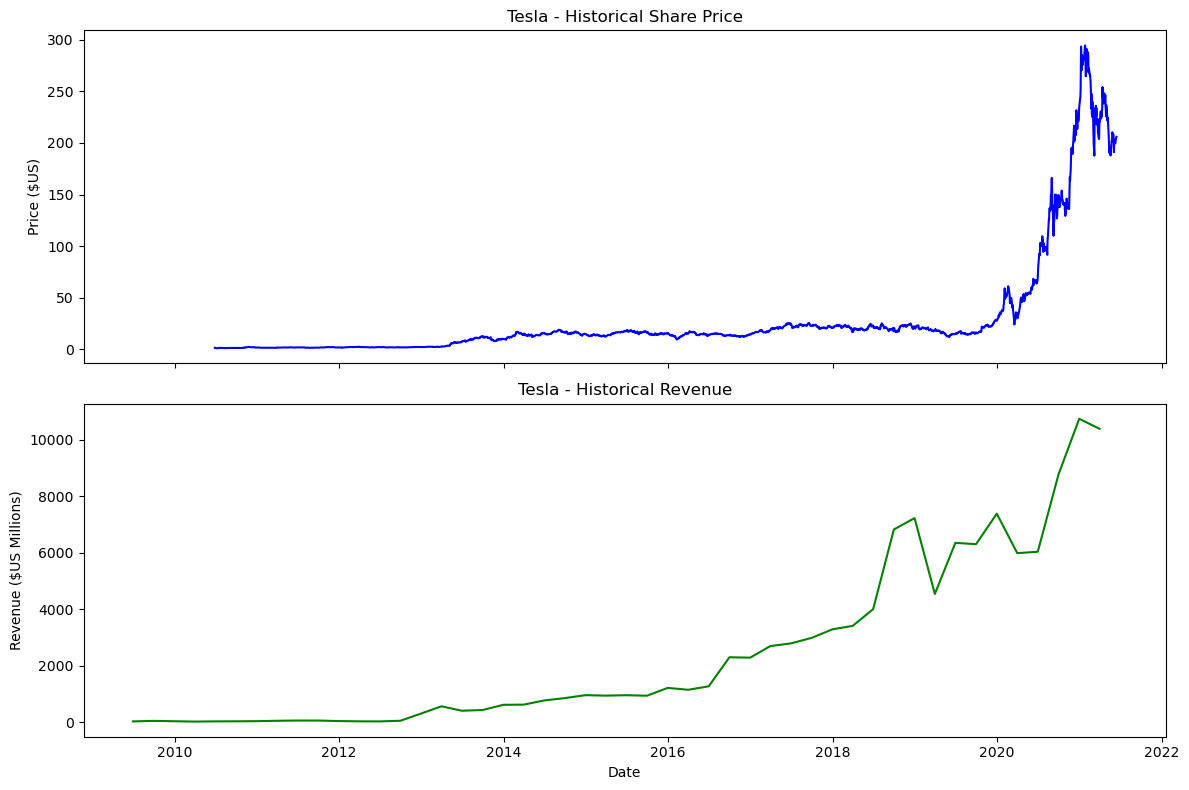

In [20]:
make_graph(tesla_data, tesla_revenue, 'Tesla')

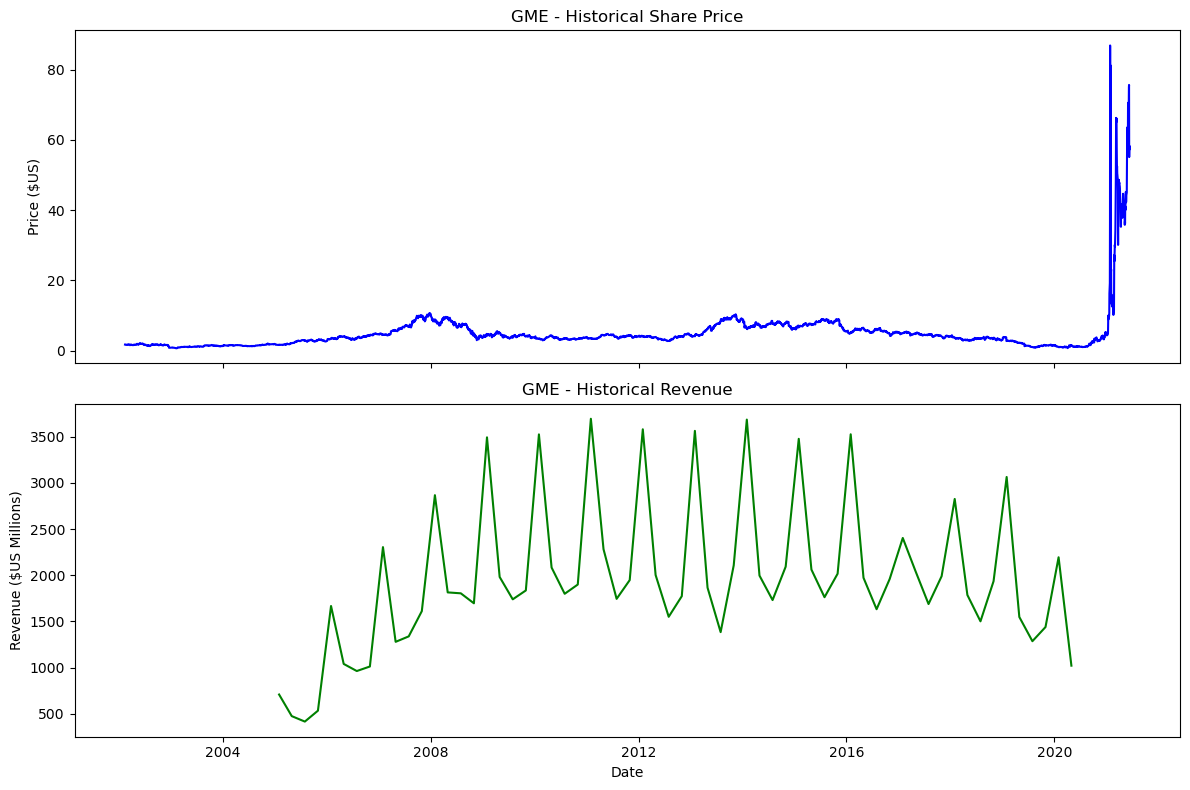

In [21]:
make_graph(gme_data, gme_revenue, 'GME')